<module 'matplotlib.pyplot' from 'c:\\Users\\tommy\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

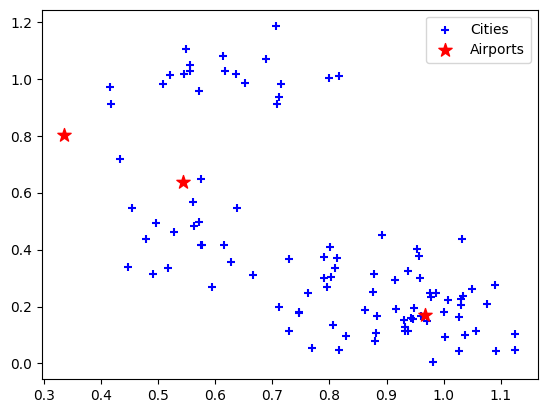

In [40]:
import random
import numpy as np
import math

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))

for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

<module 'matplotlib.pyplot' from 'c:\\Users\\tommy\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

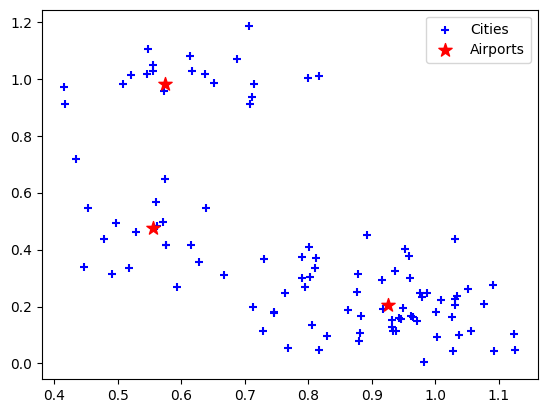

In [41]:

for i in range(50):
    # Gradient Based Optimization Algorithm
    alpha = 0.001

    # Dictionary to store all cities closest to that airport coordinate
    airplaneDict = {airports[0]: [], airports[1]: [], airports[2]: []}

    # Move city to its nearest airports
    for city in cities:
        # Compute distances of each city to each airport with distance formula
        airport1Distance = math.sqrt((airports[0][0] - city[0])**2 + (airports[0][1] - city[1]) ** 2)
        airport2Distance = math.sqrt((airports[1][0] - city[0])**2 + (airports[1][1] - city[1]) ** 2)
        airport3Distance = math.sqrt((airports[2][0] - city[0])**2 + (airports[2][1] - city[1]) ** 2)

        distances = [airport1Distance, airport2Distance, airport3Distance]
        distances.sort()

        # The minimum distance determines which airport it is close to
        if min(distances) == airport1Distance:
            airplaneDict[airports[0]].append(city)

        elif min(distances) == airport2Distance:
            airplaneDict[airports[1]].append(city)
        
        elif min(distances) == airport3Distance:
            airplaneDict[airports[2]].append(city)
        
    totalX = 0
    totalY = 0
    newAirportCoordinates = []

    for airport in airplaneDict:
        for coordinate in airplaneDict[airport]:
            totalX += 2 * (airport[0] - coordinate[0])
            totalY += 2 * (airport[1] - coordinate[1])

        newAirportCoordinates.append((totalX, totalY))
        totalX = 0
        totalY = 0

    for i in range(len(airports)):
        [a, b] = airports[i]
        [x, y] = newAirportCoordinates[i]

        airports[i] = (a - (alpha * x), b - (alpha * y))


# Plot on graph
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt